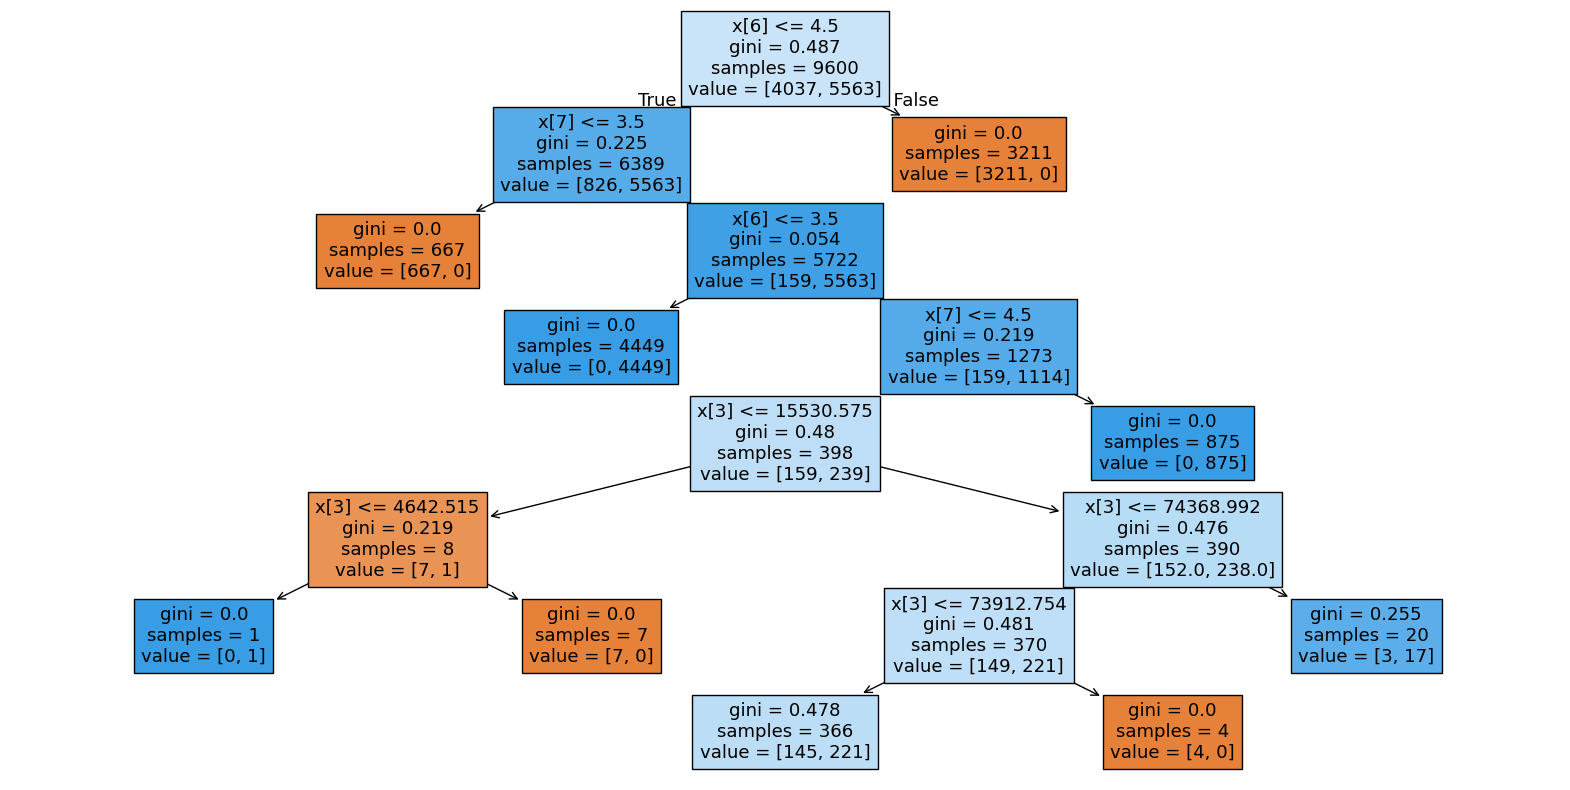

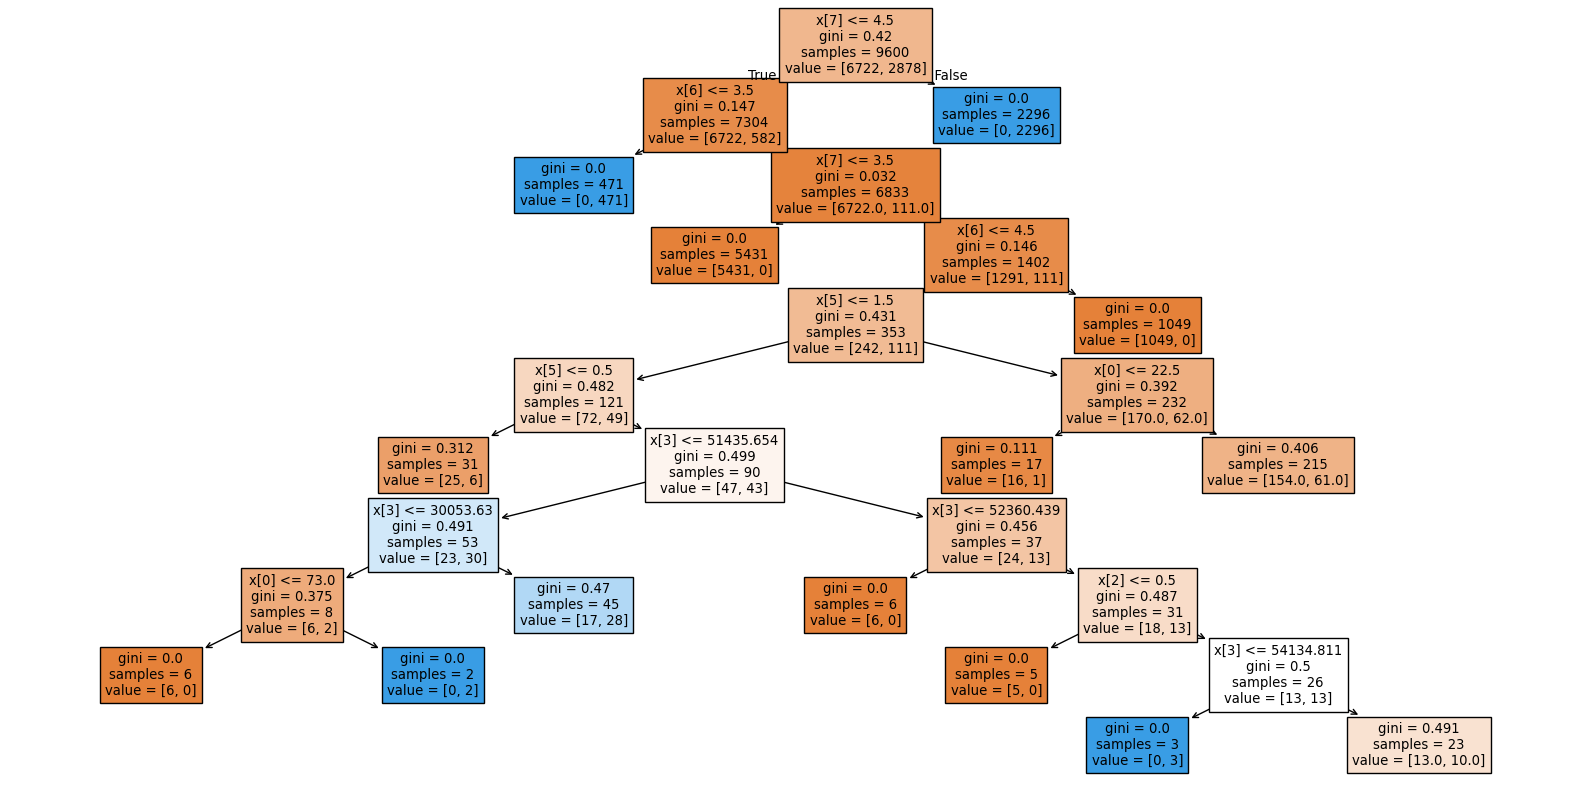

98.16666666666667
98.45833333333334


In [3]:
# Rural Decision Tree
import csv
import random
import sklearn.tree as tree
import matplotlib.pyplot as plt
import sklearn

# Import data
def processData(reader):
    i = 0
    data = []
    for row in reader:
        newRow = []
        if i > 0:
            newRow.append(row[0])
            if row[1] == 'Female':
                newRow.append(0)
            elif row[1] == 'Male':
                newRow.append(1)
            elif row[1] == 'Other':
                newRow.append('')
            if row[2] == 'Divorced':
                newRow.append(0)
            elif row[2] == 'Married':
                newRow.append(1)
            elif row[2] == 'Single':
                newRow.append(2)
            elif row[2] == 'Widowed':
                newRow.append(3)
            newRow.append(row[3])
            newRow.append(0)
            newRow.append(row[5])
            if row[6] == 'High':
                newRow.append(2)
            elif row[6] == 'Low':
                newRow.append(0)
            elif row[6] == 'Medium':
                newRow.append(1)
            if row[7] == 'Democrat':
                newRow.append(0)
            elif row[7] == 'Republican':
                newRow.append(1)
            if row[8] == 'High':
                newRow.append(1)
            elif row[8] == 'Low':
                newRow.append(0)
            elif row[8] == 'Medium':
                newRow.append(2)
            if row[9] == 'Economy':
                newRow.append(0)
            elif row[9] == 'Education':
                newRow.append(1)
            elif row[9] == 'Environment':
                newRow.append(2)
            elif row[9] == 'Healthcare':
                newRow.append(3)
            elif row[9] == 'National Security':
                newRow.append(4)
            if row[10] == 'High':
                newRow.append(2)
            elif row[10] == 'Low':
                newRow.append(0)
            elif row[10] == 'Medium':
                newRow.append(1)
            newRow.append(row[11])
            newRow.append(row[12])
            newRow.append(row[13])
            data.append(newRow)
        i = i + 1
    return data

# Find averages for empty elements
def findAverage(data):
    counter = 0
    totalChildren = 0
    for row in data:
        if row[3] != '':
            totalChildren += float(row[3])
            counter += 1
    return totalChildren/counter

#Find Average genders
def findAverageGender(data):
    counter = 0
    totalGender = 0
    for row in data:
        if row[1] != '':
            totalGender += float(row[1])
            counter += 1
    return totalGender/counter

#Fix empty elements
def fixData(average, data):
    newData = []
    for row in data:
        if row[3] == '':
            row[3] = average
        newData.append(row)
    return newData

def fixDataGender(average, data):
    newData = []
    for row in data:
        if row[1] == '':
            row[1] = average
        newData.append(row)
    return newData

def getX(data):
    x = []
    for row in data:
        x.append([int(row[0]), row[1], float(row[3]), float(row[5]), row[6], row[10], int(row[11]), int(row[12]), int(row[13])])
    return x

def getY(data):
    y = []
    for row in data:
        y.append(row[7])
    return y

def plotTree(data):
    x = getX(data)
    y = getY(data)
    grid = {'max_leaf_nodes': range(9, 20)}
    search = sklearn.model_selection.GridSearchCV(tree.DecisionTreeClassifier(random_state = 0), grid, cv = 5, return_train_score = True)
    search.fit(x, y)
    search = search.best_estimator_
    plt.figure(figsize = (20, 10))
    tree.plot_tree(search, filled = True)
    plt.show()
    return search

def testTree(tree, data):
    x = getX(data)
    y = getY(data)
    predicted = tree.predict(x)
    nums = 0
    accurate = 0
    for (i, j) in zip(y, predicted):
        nums = nums + 1
        if (i == j):
            accurate = accurate + 1
    if (nums != 0):
        accurate = accurate / nums
        accurate = accurate * 100
    return accurate


# Read in and sort data.
ruralFile = open('rural.csv', newline = '')
urbanFile = open('urban.csv', newline = '')
ruralReader = csv.reader(ruralFile, delimiter = ',')
urbanReader = csv.reader(urbanFile, delimiter = ',')
ruralData = processData(ruralReader)
urbanData = processData(urbanReader)
ruralAverage = findAverage(ruralData)
urbanAverage = findAverage(urbanData)
ruralAverageGender = findAverageGender(ruralData)
urbanAverageGender = findAverageGender(urbanData)
ruralData = fixData(ruralAverage, ruralData)
urbanData = fixData(urbanAverage, urbanData)
ruralData = fixDataGender(ruralAverageGender, ruralData)
urbanData = fixDataGender(urbanAverageGender, urbanData)
random.shuffle(ruralData)
random.shuffle(urbanData)

# Separate into test and train.
ruralTotal = len(ruralData)
urbanTotal = len(urbanData)
ruralTrainSize = int(ruralTotal * 0.8)
urbanTrainSize = int(urbanTotal * 0.8)
ruralTrain = ruralData[:ruralTrainSize]
ruralTest = ruralData[ruralTrainSize:]
urbanTrain = urbanData[:urbanTrainSize]
urbanTest = urbanData[urbanTrainSize:]

# Plot the trees
ruralTrain = ruralTrain[:9600]
urbanTrain = urbanTrain[:9600]
ruralTree = plotTree(ruralTrain)
urbanTree = plotTree(urbanTrain)


#Test the accuracy of the tree
ruralTest = ruralTest[:2400]
urbanTest = urbanTest[:2400]

print(testTree(ruralTree, ruralTest))
print(testTree(urbanTree, urbanTest))


In [59]:
counter = 0
for row in urbanTrain:
    print(row[9])
print(counter)

1987
